# Regresión lineal multivariable

<div class="alert alert-info", role="alert">
    <p>
      🎯 El objetivo de este notebook es crear un ejemplo de regresión lineal miltivariable, se usara el mismo dataset el notebook <a href="./0.0-regresion-lineal_python-introduction.ipynb">anterior</a>, por lo tanto el archivo CSV ya debe estar descargado en la carpeta data/raw
    </p>
</div>

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import sys
sys.path.append("..")

import modules.utils.paths as path

sns.set_style(style="whitegrid")

In [2]:
%load_ext autoreload
%autoreload 2

## Carga de datos

In [3]:
file_path = path.data_raw_dir("housing.csv")
housing_df = pd.read_csv(file_path, header=None, sep="\s+")
housing_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Variables con mayor correlación 

Buscamos las variables com mayor correlación hacia la variable objetivo `MEDV`.

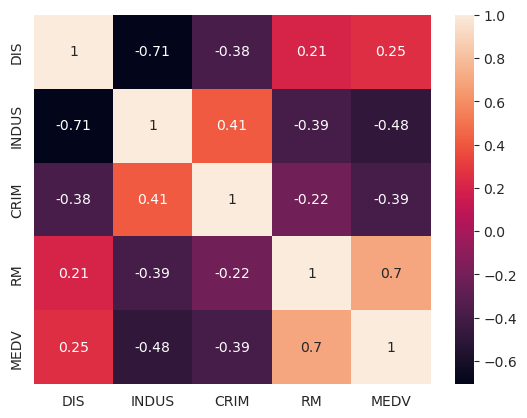

In [4]:
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]
cm = np.corrcoef(housing_df[cols].values.T)
sns.heatmap(cm,
  cbar=True,
  annot=True,
  yticklabels=cols,
  xticklabels=cols
)
plt.show()

La variable objetivo `MEDV` tiene mayor correlación con `RM` y `INDUS`.

## Entrenando al modelo

In [5]:
# Variables objetivo y predictora
x = housing_df[["RM", "INDUS"]].values
y = housing_df["MEDV"].values.reshape(-1, 1)

# Estandatizamos los datos
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_std = x_scaler.fit_transform(x)
Y_std = y_scaler.fit_transform(y)

# Creamos el modelo
slr = LinearRegression()

slr.fit(X_std, Y_std)

LinearRegression()

## Análisis de resultados

/home/pahoalapizco/anaconda3/envs/regresion_python/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


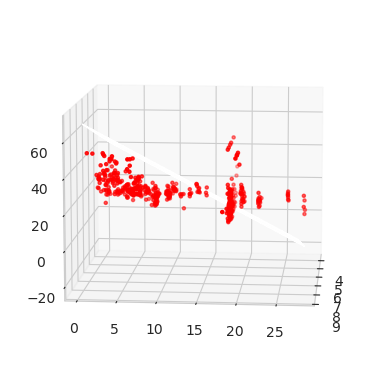

In [6]:
from mpl_toolkits.mplot3d import *

x1_range = np.arange(housing_df["RM"].min(), housing_df["RM"].max())
x2_range = np.arange(housing_df["INDUS"].min(), housing_df["INDUS"].max())

# Generamos una "malla" con todas las combinaciones posibles entre ambos rangos de datos
X1, X2 = np.meshgrid(x1_range, x2_range)

# Creamos un Dataframe con esrtas combinaciones
plano = pd.DataFrame({
  "RM": X1.ravel(),
  "INDUS": X2.ravel()
})

# Generamos las predicciones con la combinación de los rangos de valores de ambas variables independiente
pred = slr.predict(plano).reshape(X1.shape)
# Reescalamos los valores predichos a una escala real
pred = y_scaler.inverse_transform(pred)

# Graficamos un plano 3d para visualizar los resultados del entrenamito
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X1, X2, pred, alpha=.5)

ax.scatter3D(
  housing_df["RM"],
  housing_df["INDUS"],
  housing_df["MEDV"],
  color="r",
  marker="."
)

# Cambiamos la perspectiva del gáfico
ax.view_init(elev=10, azim=5)

plt.show()